# GPA AND STUDY HOUR ANALYSIS

### INTRODUCTION


##### in this data science project, we will try to gain insight into the relationship between the GPA and study hours of a typical student
##### we will build a model and with this model, will also try to predict the GPA of any student based on the number of hours they put into studying

## Table of contents

### 1. Importing Libraries and Loading Data
### 2.Data Exploration
###### -Overview of the Dataset
###### -Descriptive Statistics
###### -Data Visualization
### 3.Data Preprocessing
###### -Handling Missing Values
###### -Outlier Detection and Treatment
### 4.Exploratory Data Analysis
###### -Correlation Analysis
###### -GPA vs. Study Hours
###### -Distribution of GPA and Study Hours
### 5.Prediction
###### -interpretation
### 6.Conclusion

### 1. Importing Libraries and Loading Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [3]:
# Load the dataset
data = pd.read_csv('gpa_study_hours.csv')

### 2.Data Exploration

In [68]:
# overview of the dataset

print(data.head(10))
print(data.info())

    gpa  study_hours
0  4.00         10.0
1  3.80         25.0
2  3.93         45.0
3  3.40         10.0
4  3.20          4.0
5  3.52         10.0
6  3.68         24.0
7  3.40         40.0
8  3.70         10.0
9  3.75         10.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gpa          193 non-null    float64
 1   study_hours  193 non-null    float64
dtypes: float64(2)
memory usage: 3.1 KB
None


In [8]:
# descriptive statistics
data.describe()

,gpa,study_hours
count,193.000000,193.000000
mean,3.586166,17.476684
std,0.285482,11.408980
min,2.600000,2.000000
25%,3.400000,10.000000
50%,3.620000,15.000000
75%,3.800000,20.000000
max,4.300000,69.000000


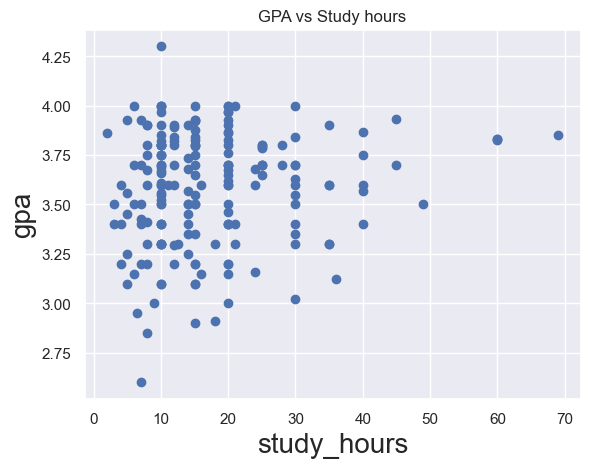

In [17]:
# data visualization
# scatter plot of gpa vs study hours

y = data['gpa']
x = data['study_hours']

plt.scatter(x,y)
plt.xlabel('study_hours', fontsize = 20)
plt.ylabel('gpa', fontsize = 20)
plt.title('GPA vs Study hours')
plt.show()

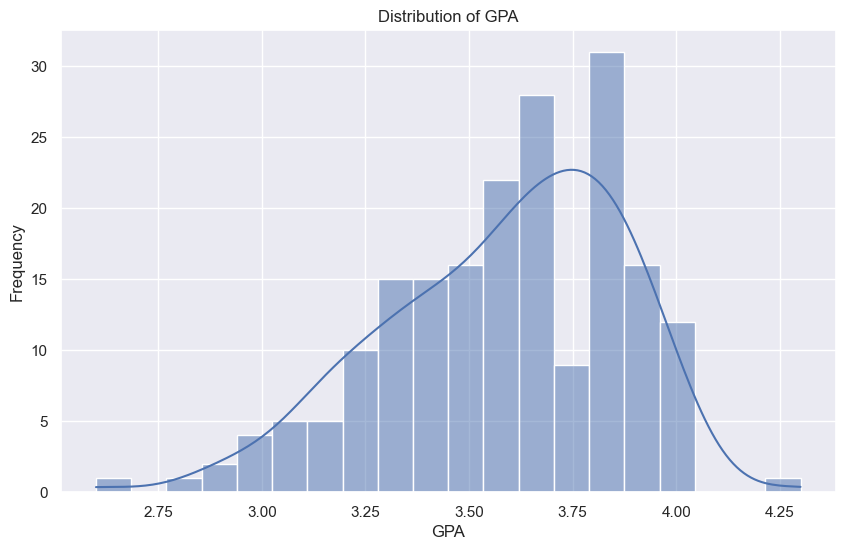

In [20]:
# Histogram of GPA
plt.figure(figsize=(10, 6))
sns.histplot(data['gpa'], bins=20, kde=True)
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

### 3.Data Preprocessing


###### -Handling Missing Values


In [28]:
print(data.isnull().sum())

gpa            0
study_hours    0
dtype: int64



###### -Outlier Detection and Treatment

C:\Users\SANI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


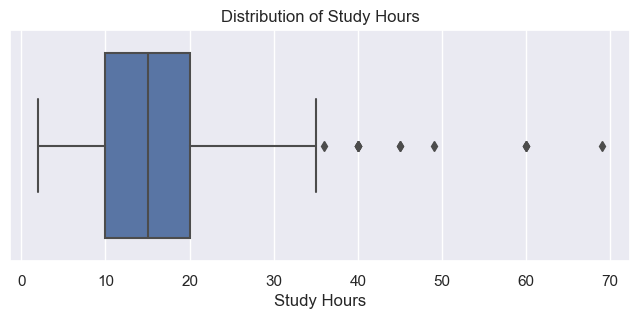

In [29]:
# using box plot to check for outliers
plt.figure(figsize=(8, 3))
sns.boxplot(data['study_hours'])
plt.title('Distribution of Study Hours')
plt.xlabel('Study Hours')
plt.show()

C:\Users\SANI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


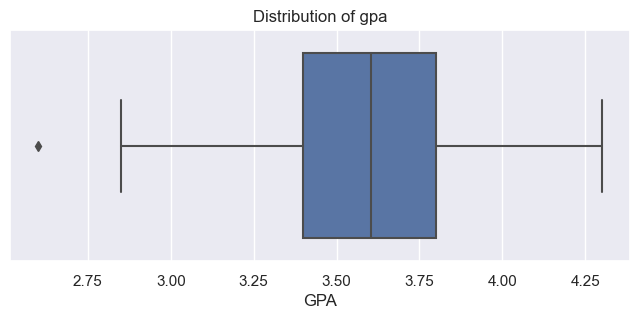

In [32]:
plt.figure(figsize=(8, 3))
sns.boxplot(data['gpa'])
plt.title('Distribution of gpa')
plt.xlabel('GPA')
plt.show()

In [33]:
# Remove outliers using IQR method
Q1 = data['study_hours'].quantile(0.25)
Q3 = data['study_hours'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['study_hours'] >= lower_bound) & (data['study_hours'] <= upper_bound)]

### 4.Exploratory Data Analysis


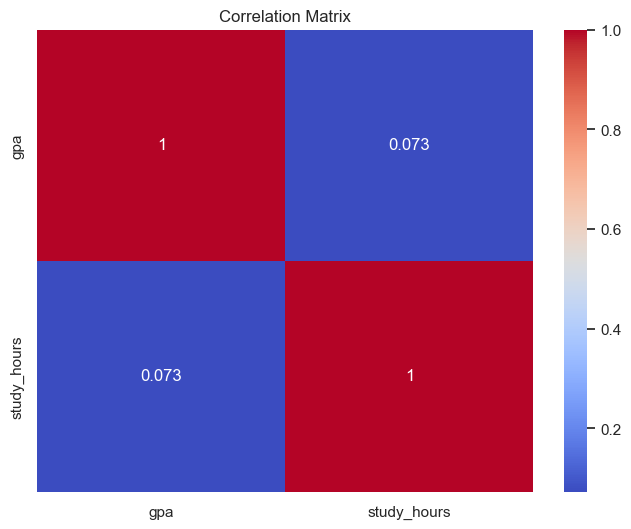

In [35]:
###### -Correlation Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:

###### -Distribution of GPA and Study Hours
### 5.Conclusion

###### - Regression  (GPA vs. Study Hours)

In [62]:
x =sm.add_constant(x1)
model = sm.OLS(y,x).fit()
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpa   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.440
Date:                Tue, 26 Dec 2023   Prob (F-statistic):             0.0652
Time:                        11:37:53   Log-Likelihood:                -29.691
No. Observations:                 193   AIC:                             63.38
Df Residuals:                     191   BIC:                             69.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.5280      0.037     94.272      0.000       3.454       3.602
study_hours     0.0033      0.002      1.855      0.065      -0.000       0.007
==============================================================================
Omnibus:                        8.418   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.684
Skew:                          -0.520   Prob(JB):                       0.0130
Kurtosis:                       2.993   Cond. No.                         38.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

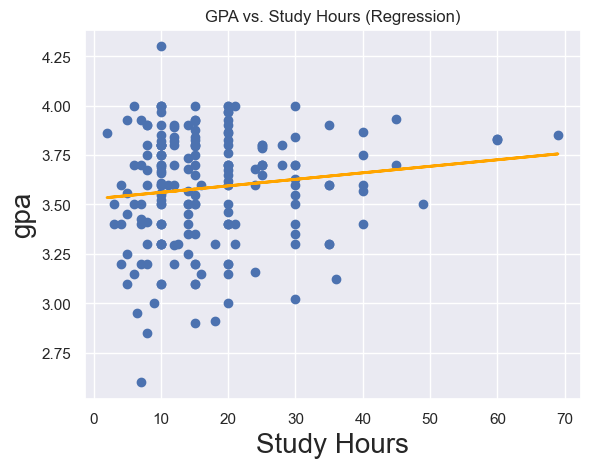

In [53]:
# using ols for the regression

plt.scatter(x1,y)
yhat =0.0033*x1 +3.528
fig = plt.plot(x1,yhat,lw = 2, c = 'orange', label ='Regression Line')
plt.xlabel('Study Hours', fontsize = 20)
plt.title('GPA vs. Study Hours (Regression)')
plt.ylabel('gpa', fontsize = 20)
plt.show()

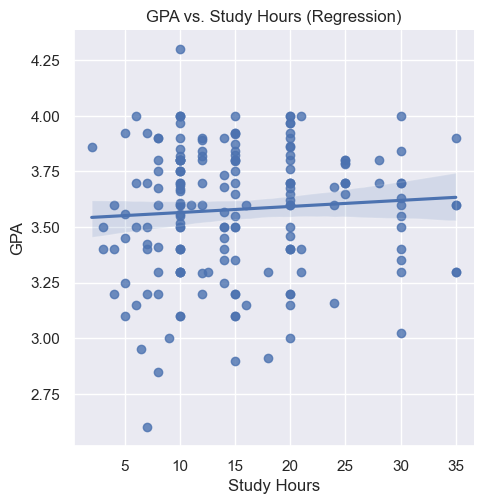

In [51]:
#using seanborn for the regression
sns.lmplot(data=data, x='study_hours', y='gpa')
plt.title('GPA vs. Study Hours (Regression)')
plt.xlabel('Study Hours')
plt.ylabel('GPA')
plt.show()

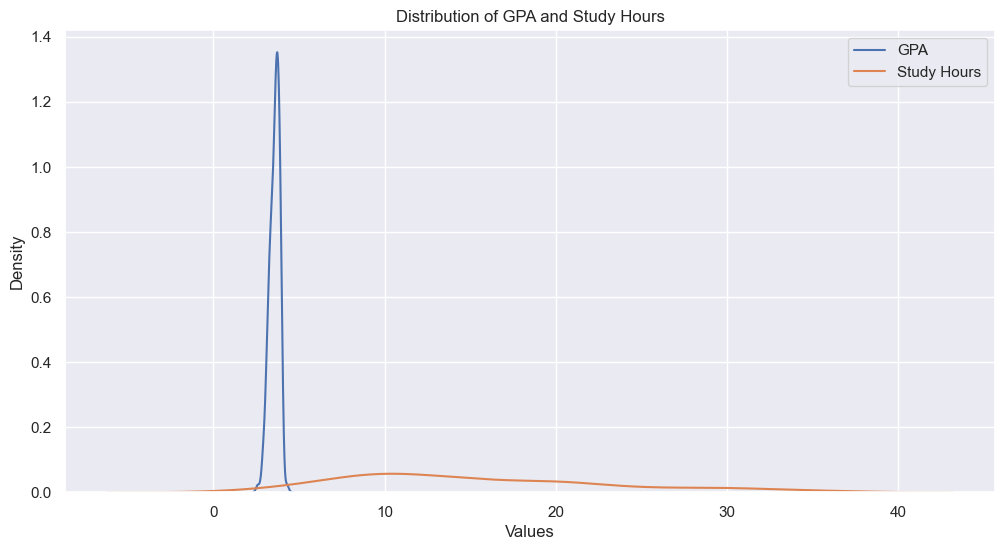

In [49]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data['gpa'], label='GPA')
sns.kdeplot(data['study_hours'], label='Study Hours')
plt.title('Distribution of GPA and Study Hours')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

### Making predictions

In [64]:
#we will be using the results generated above to predict the GPA of some students given their study hours
#create new data
df_new = pd.DataFrame({'study_hours':[1,10,31,25,13,50,21,49,34,60,80]})
#add column for constant
df_new = sm.add_constant(df_new)
print(df_new)

    const  study_hours
0     1.0            1
1     1.0           10
2     1.0           31
3     1.0           25
4     1.0           13
5     1.0           50
6     1.0           21
7     1.0           49
8     1.0           34
9     1.0           60
10    1.0           80


In [65]:
# predict for the ten students
model.predict(df_new)

0     3.531326
1     3.561281
2     3.631176
3     3.611206
4     3.571266
5     3.694415
6     3.597893
7     3.691086
8     3.641161
9     3.727698
10    3.794265
dtype: float64

### 5. Interpretation


###### Our prediction shows that that the higher the study_hours of a student, the higher likely is the gpa
#####  Using the equation yhat = 0.0033*x1 +3.528
###### A student with a study hour of 1 has a gpa of 3.53 and a student with a study hour of 80 has a gpa 0f 3.794
##### However, this gives a question of if our model is accurate or not 
##### The model was accurate based on the number of variables 
##### but it seems we need to consider other factors that could affect gpa in our analysis

### 6.Conclusion

In this analysis, we explored a dataset containing GPA and study hours data to uncover insights about the relationship between
these two variables. Through a series of data exploration, visualization, and analysis techniques, we gained valuable insights into the dataset.

###### Key Findings:

###### -We observed a moderate positive correlation between study hours and GPA, indicating that students who study more tend to have higher GPAs.
###### -The scatter plot and regression line revealed a general trend where as study hours increase, GPA also tends to increase.
###### -The distribution plots showcased that the majority of students have GPAs clustered around certain values and follow a relatively normal distribution.
###### -Data preprocessing played a crucial role in ensuring the quality of our analysis. We addressed missing values and outliers using box plot and IQR method,without this consideration, potentially our rersults  might have been skewed.
###### -Additionally, exploratory data analysis provided a comprehensive overview of the dataset's characteristics.



This analysis can provide valuable insights for both students and educators. Students can gain an understanding of the potential impact of their study habits on their academic performance, while educators can use these insights to tailor teaching strategies and support and mentorship mechanisms.

As a next step, we can conduct further investigation to gain insight on other potential factors that could influence GPA, such as IQ, extracurricular activities, sleep patterns, or stress levels. Additionally, predictive modeling techniques could be employed to build models that predict GPA based on study hours and other relevant features.



In conclusion,
the analysis highlights the positive relationship between study hours and GPA, shedding light on the importance of effective time management and dedication to academic success. 
This understanding can serve as a valuable tool for students aiming to enhance their academic performance and for educators seeking to optimize their teaching strategies.
